In [77]:
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

plt.style.use('./dataset/elegant-scipy/style/elegant.mplstyle')

# 画像を扱う

## np.arrayをimageで表現する

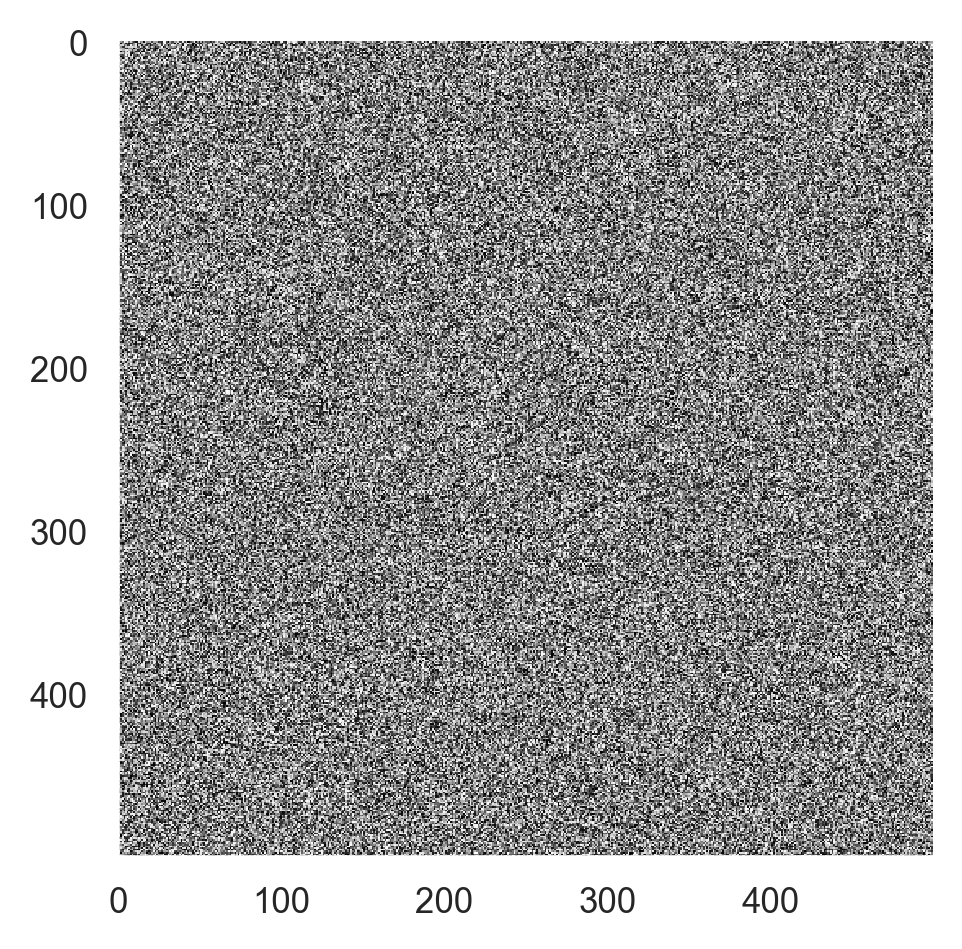

In [78]:
random_image=np.random.rand(500,500)
# imshowはnumpy arrayを画像として表示する
plt.imshow(random_image)

## 画像をarrayで表現する

Type is <class 'numpy.ndarray'>,Shape is (303, 384),DataType is uint8


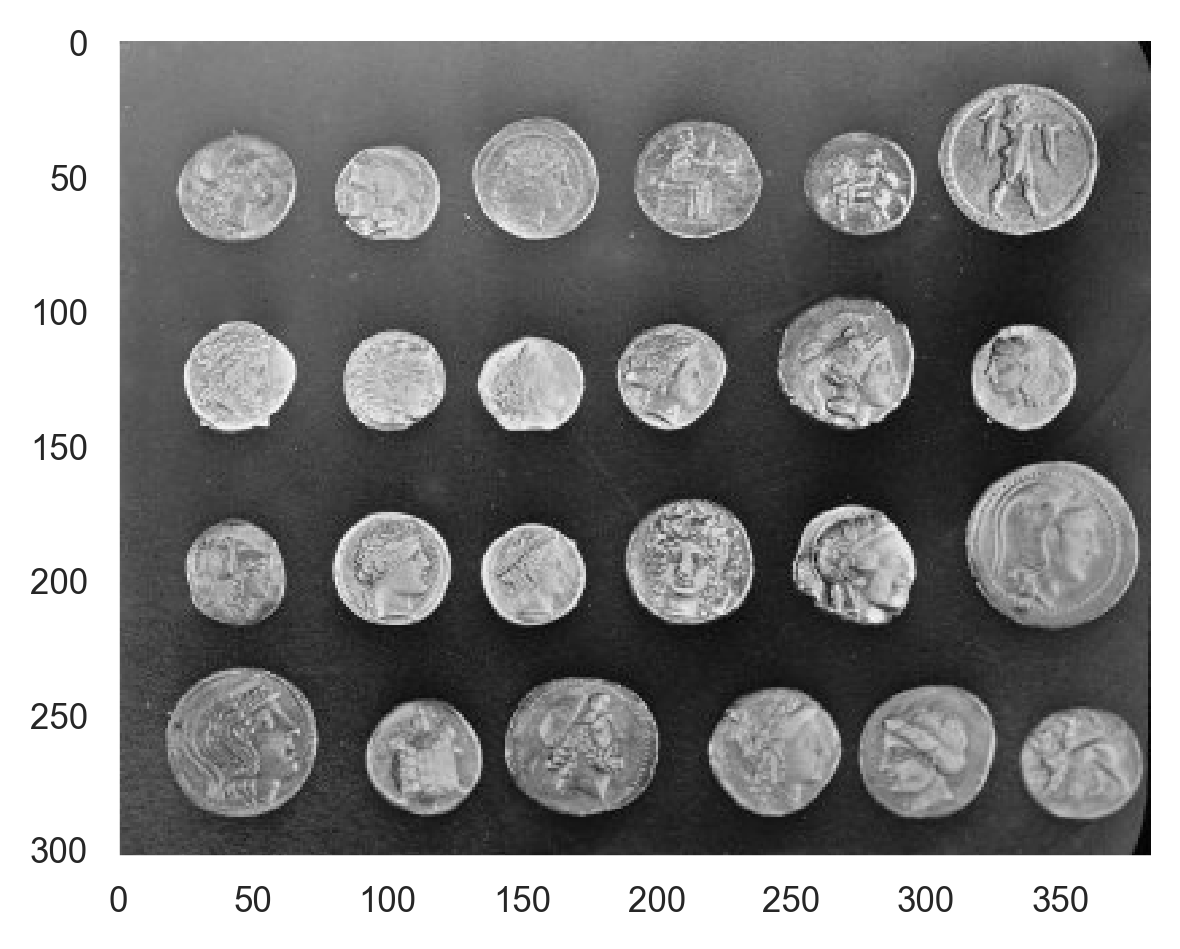

In [79]:
from skimage import  io

url_coins = ('https://raw.githubusercontent.com/scikit-image/scikit-image/'
             'v0.10.1/skimage/data/coins.png')
coins=io.imread(url_coins)

print(f'Type is {type(coins)},Shape is {coins.shape},DataType is {coins.dtype}')
plt.imshow(coins)

## カラーイメージの場合、3次元になる

Type is <class 'numpy.ndarray'>,Shape is (512, 512, 3),DataType is uint8


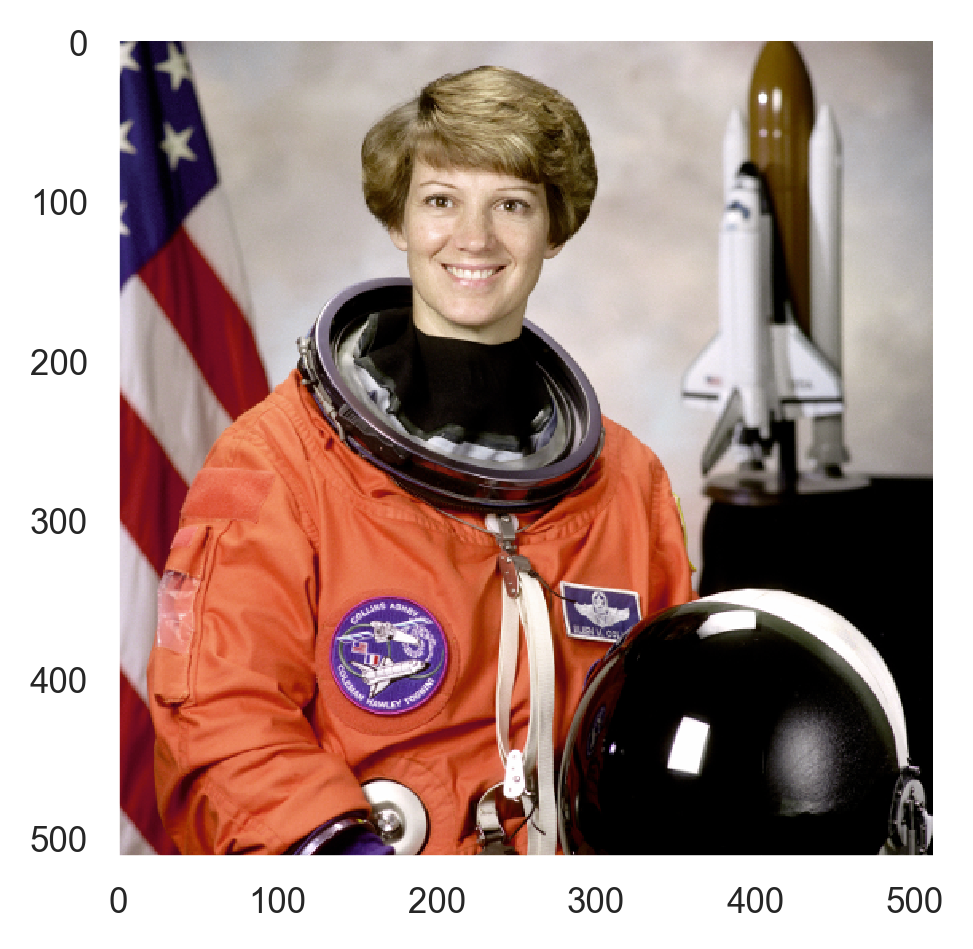

In [80]:
url_astronaut = ('https://raw.githubusercontent.com/scikit-image/scikit-image/'
                 'master/skimage/data/astronaut.png')
astro=io.imread(url_astronaut)

print(f'Type is {type(astro)},Shape is {astro.shape},DataType is {astro.dtype}')

plt.imshow(astro)

### 加工してみる

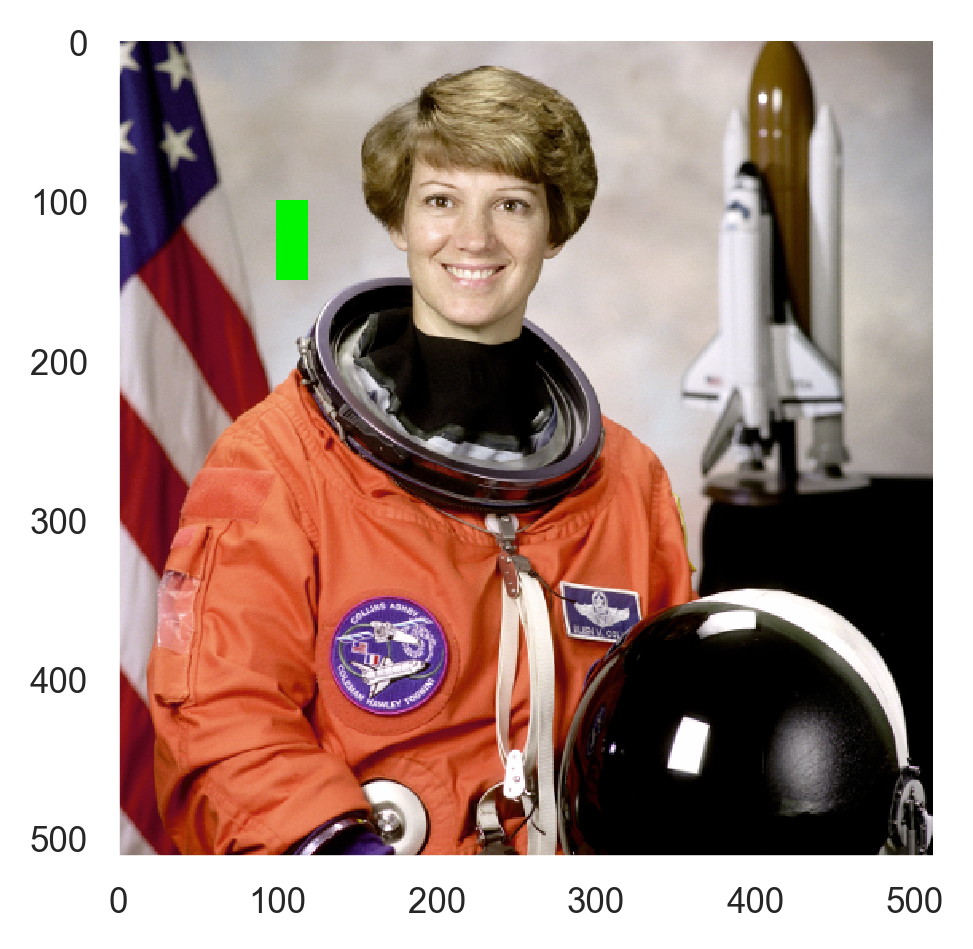

In [81]:
astro_sq=np.copy(astro)

astro_sq[100:150,100:120]=[0,244,0]

plt.imshow(astro_sq)

# シグナルプロセッシングでフィルタリング

## 1Dの例:光ファイバーの光の時間経過を考える

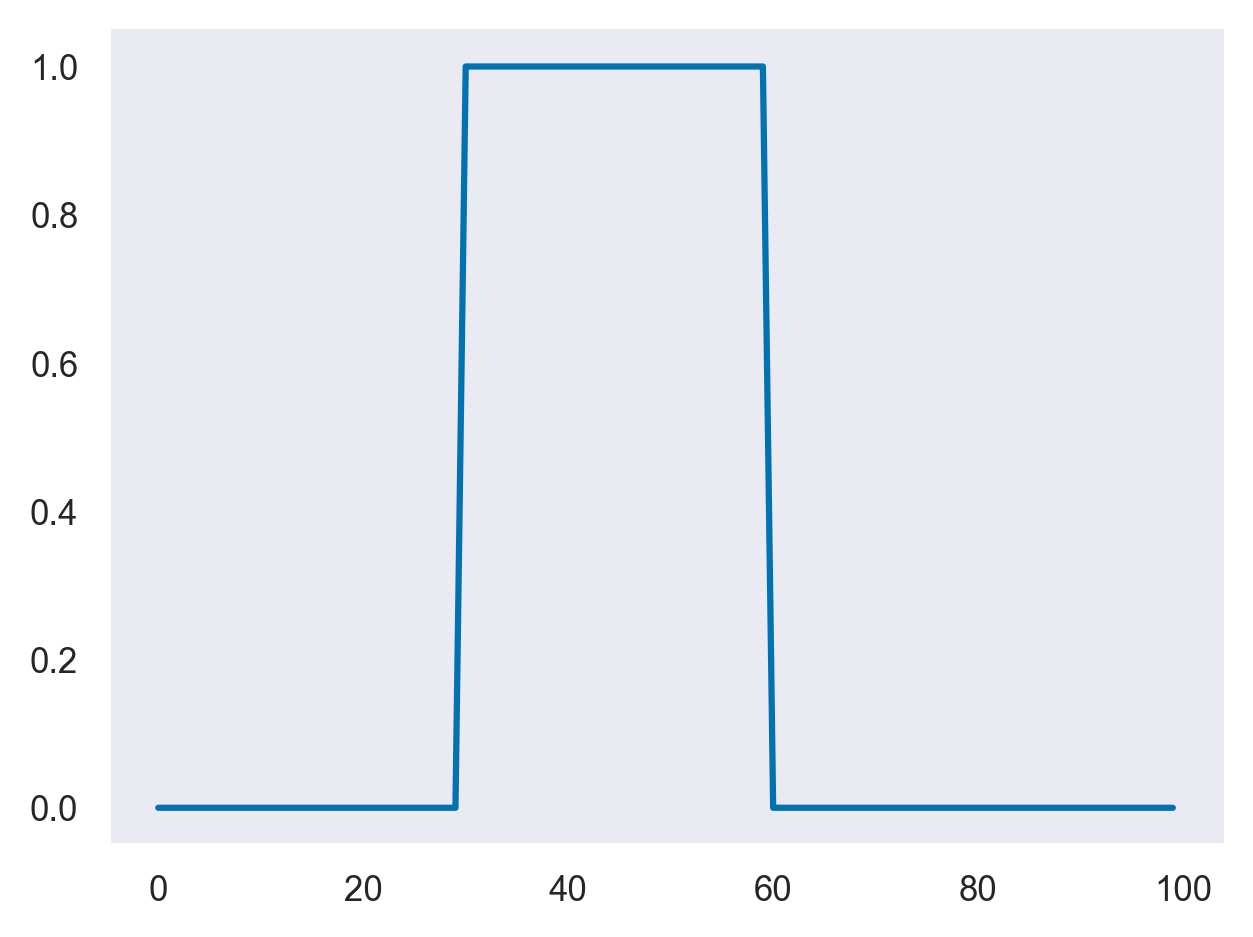

In [82]:
sig=np.zeros(100,np.float)
sig[30:60]=1

fig,ax=plt.subplots()

ax.plot(sig)

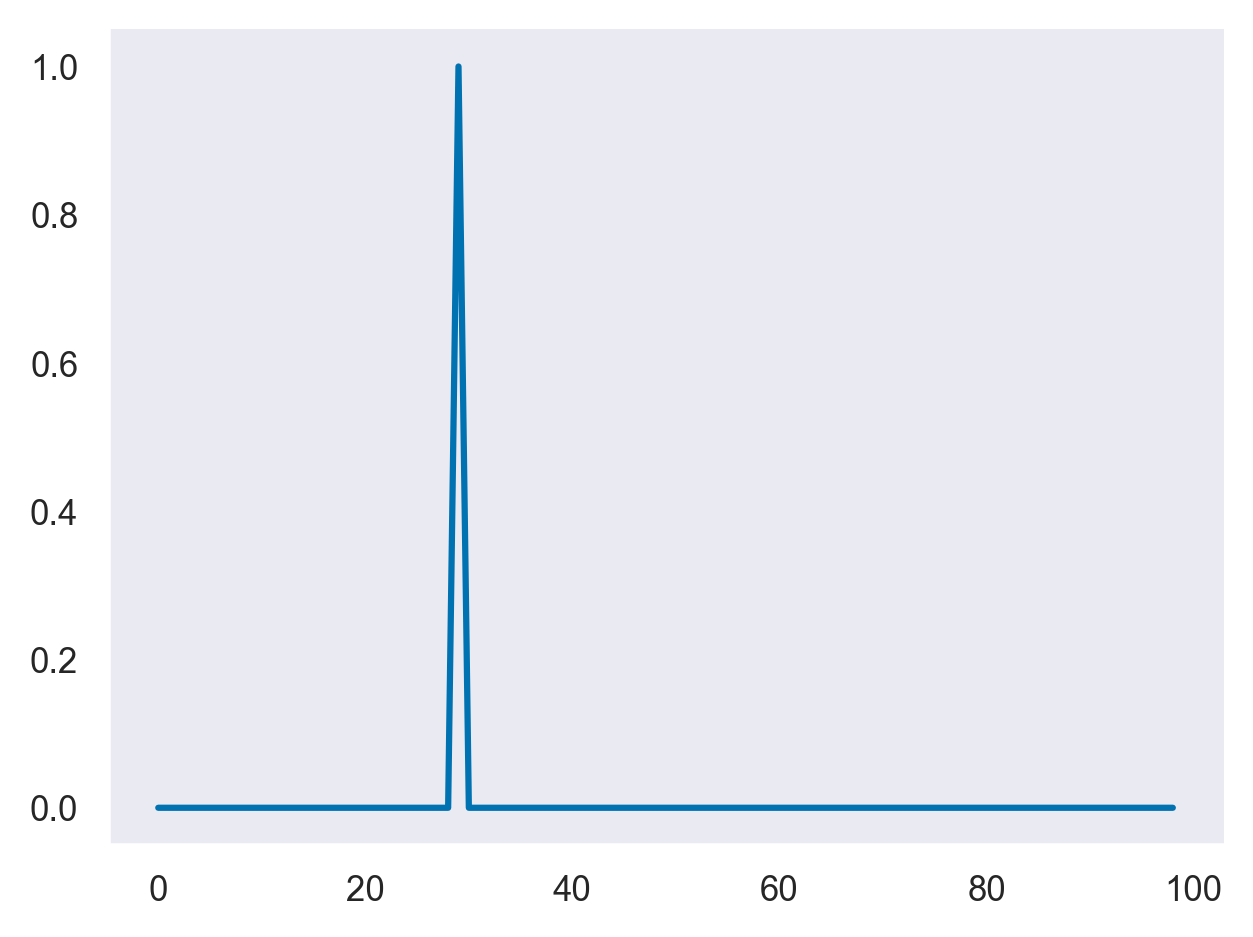

In [83]:
# 1ms後のシグナル　
sigdelta=sig[1:]
# 1msにnegativeなシグナルを送り込んだときの差分
sigdiff=sigdelta-sig[:-1]

# positiveなsignalだけフィルタリング
# 正の値の場合、sigdiff,負の場合0となる
sigon=np.clip(sigdiff,0,np.inf)

fig,ax=plt.subplots()
ax.plot(sigon)

## convolutionの概念

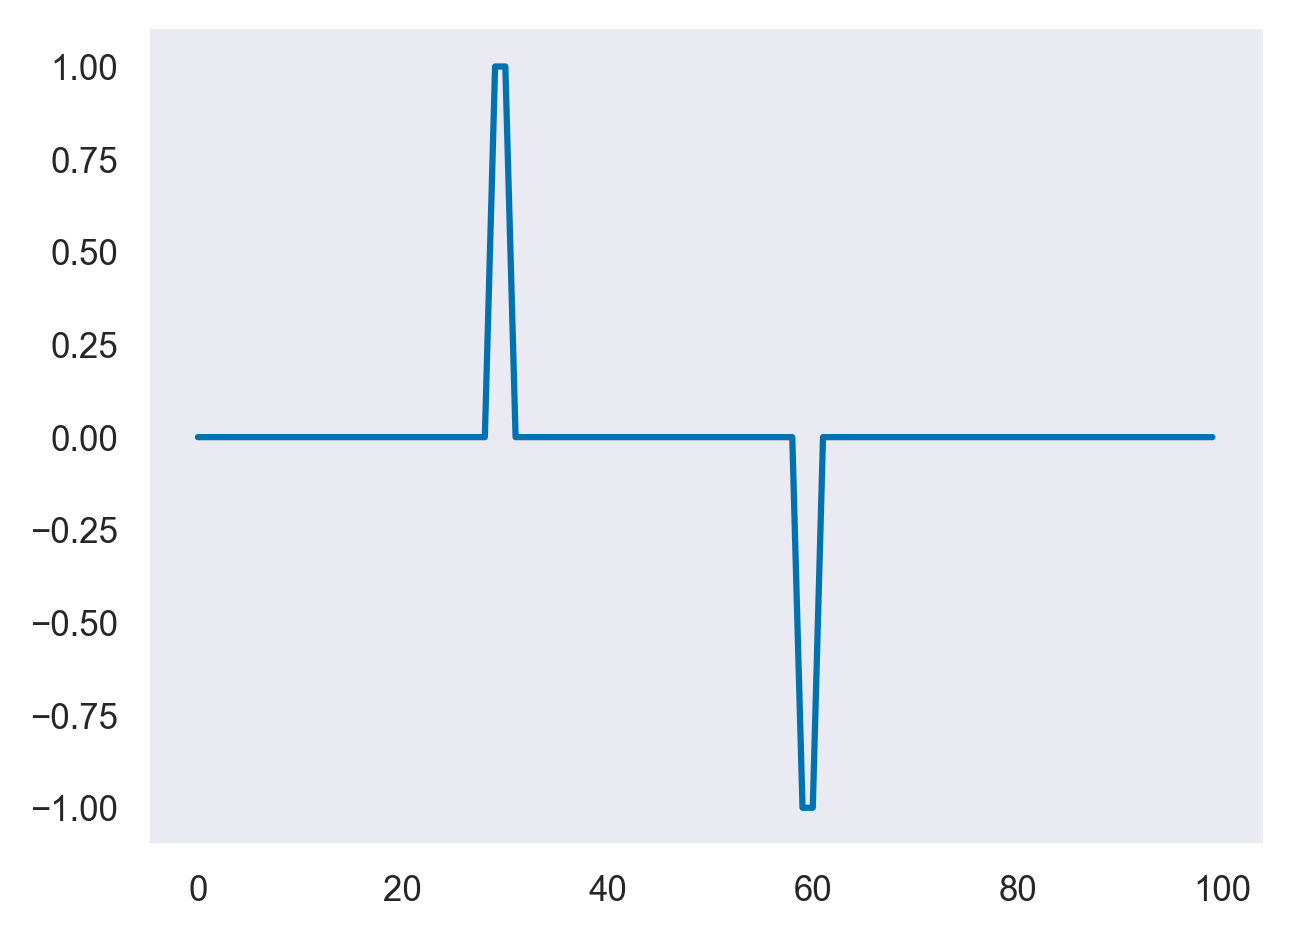

In [84]:
# 一msごと一ms前のシグナルの差分を取るkernel
diff=np.array([1,0,-1])
from scipy import ndimage as ndi
dsig=ndi.convolve(sig,diff)

plt.plot(dsig)

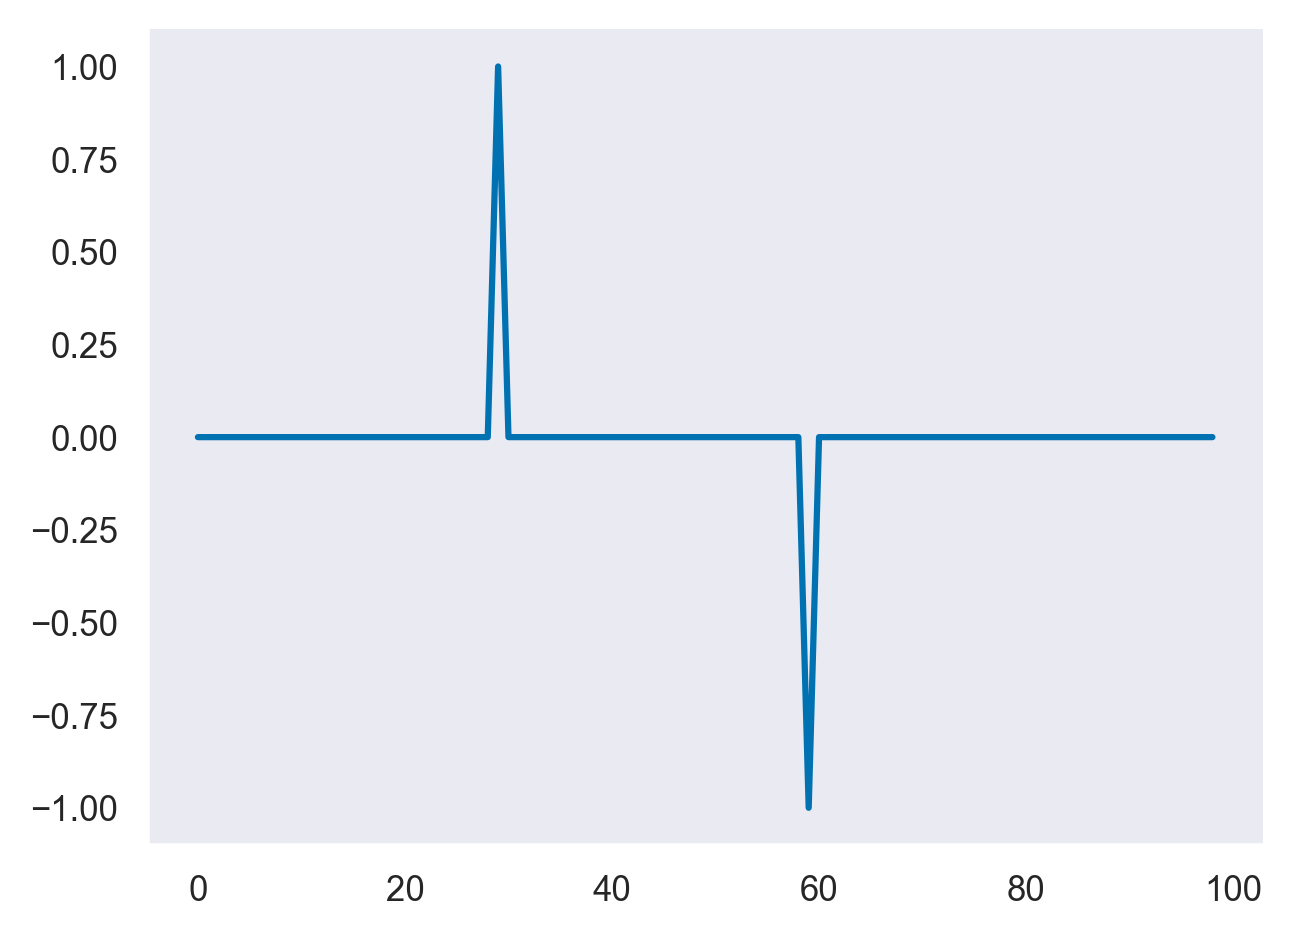

In [87]:
# 先程の形と同じ様になる
plt.plot(sigdiff)

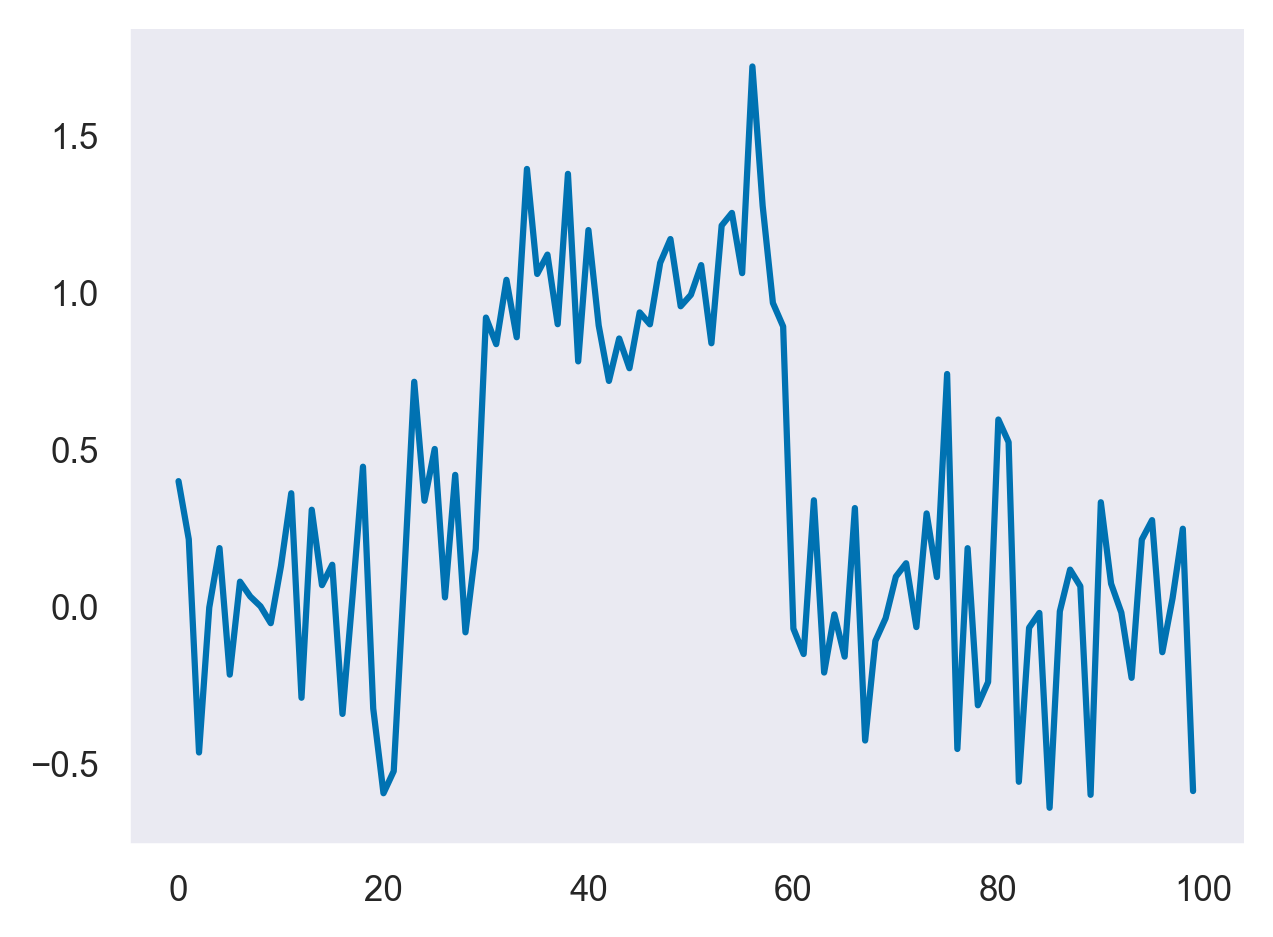

In [94]:
# ノイズをふくんだsignal
np.random.seed(10)
sigrn=sig+np.random.normal(0,0.3,size=sig.shape)

plt.plot(sigrn)

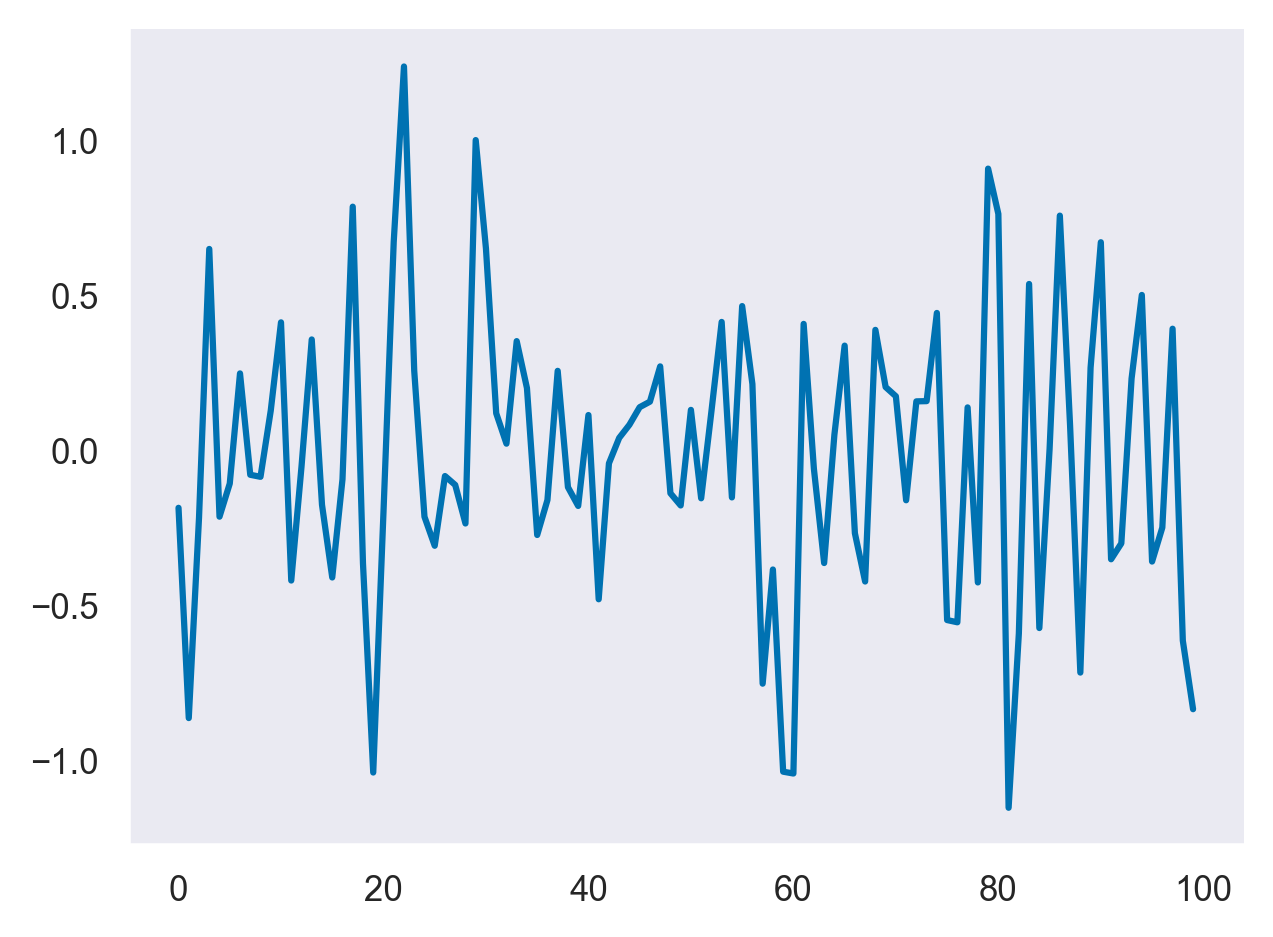

In [96]:
# ノイズがあるsignalに先程のkernelでcov
plt.plot(ndi.convolve(sigrn,diff))

### ノイズがあるsignlを近傍の平均を取ることでスムージング

In [135]:
def gaussian_kernel(size,sigma):
#     必ず偶関数のようになるようにするため、size//2項を追加
    pos=np.arange(size)-size//2
    kernel_raw=np.exp(-pos**2/(2*sigma**2))
    kernel_normed=kernel_raw/np.sum(kernel_raw)
    
    return kernel_normed

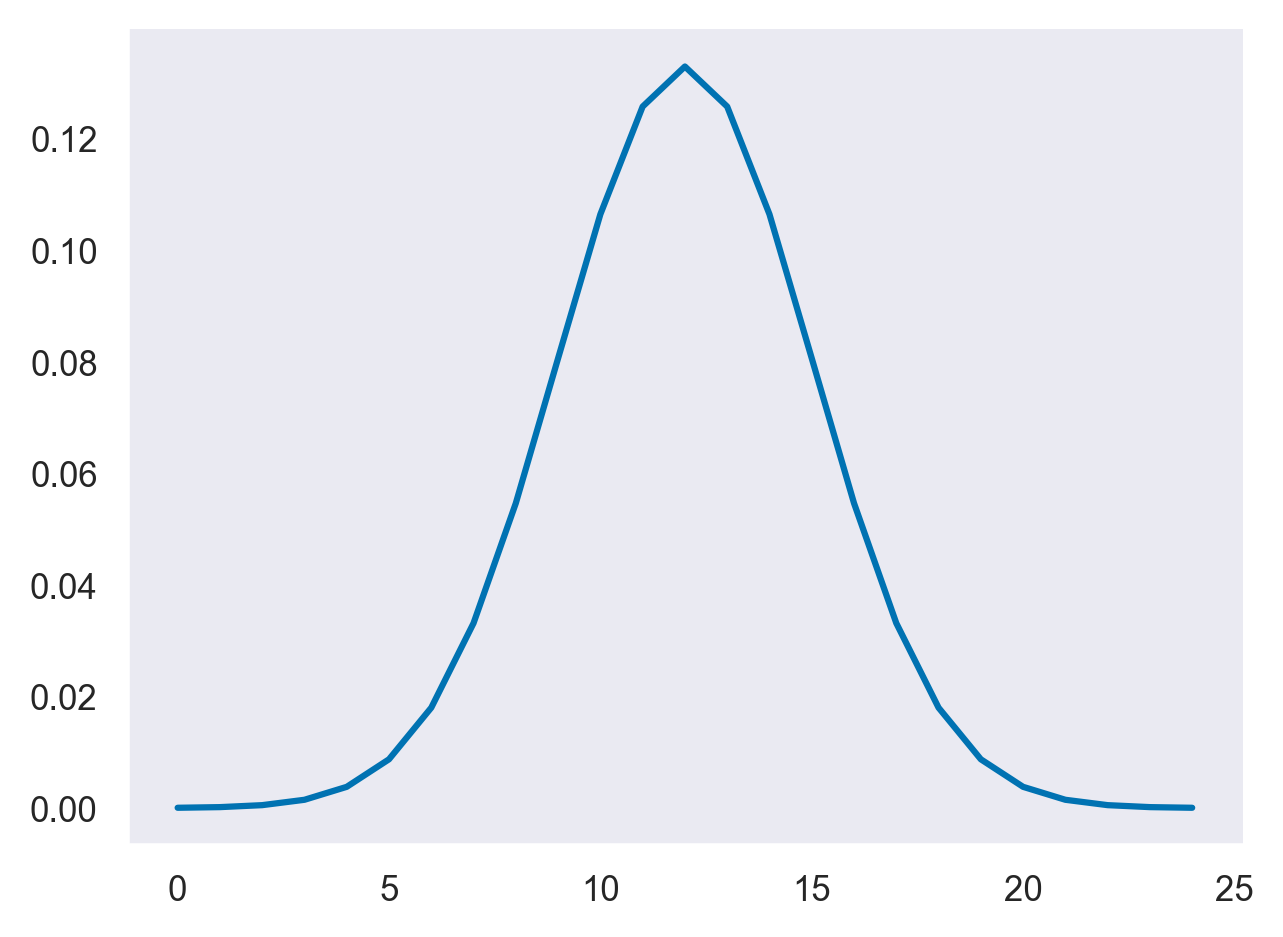

In [136]:
plt.plot(gaussian_kernel(25,3))

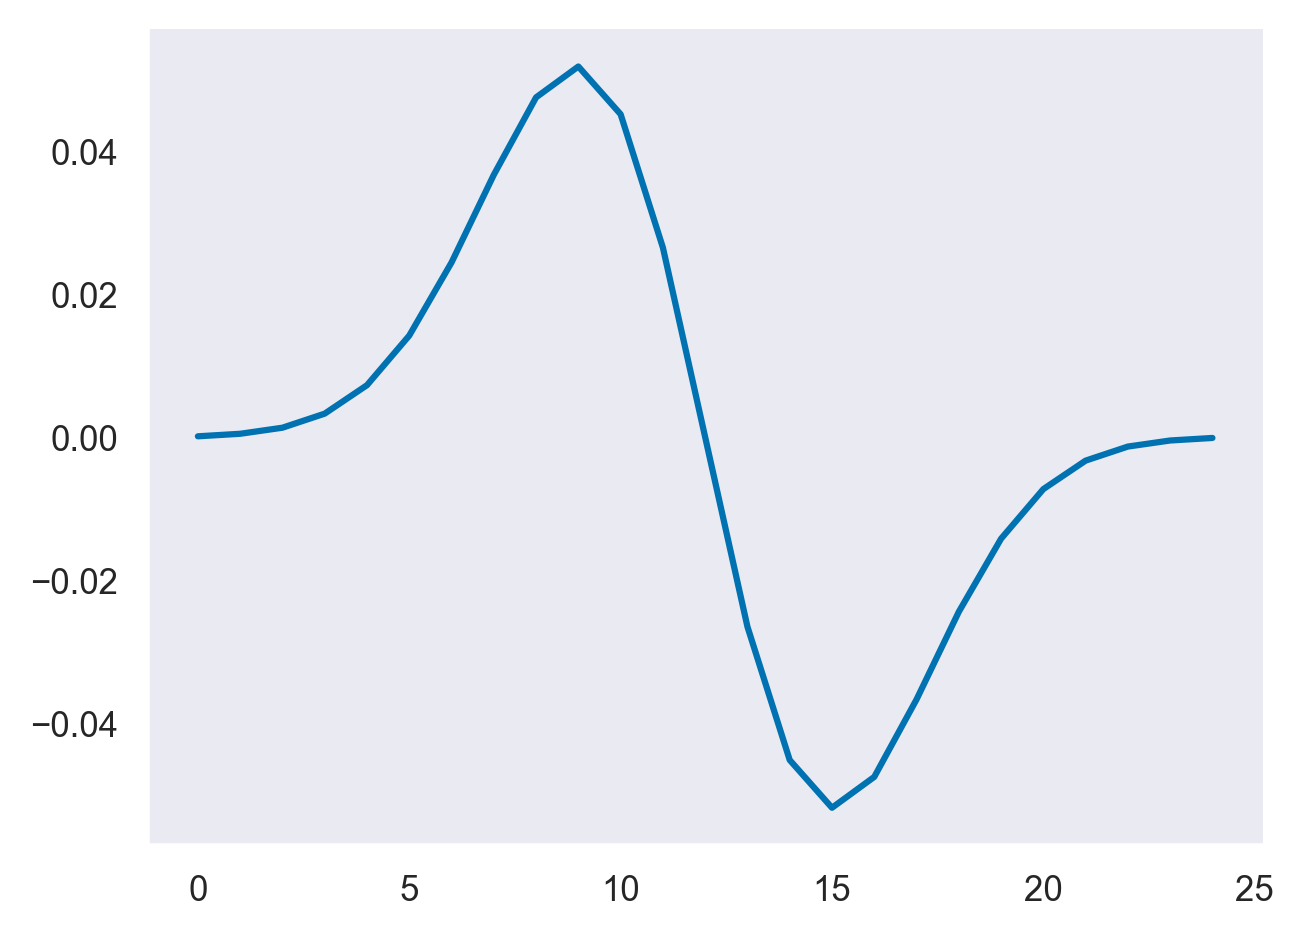

In [137]:
smooth_diff=ndi.convolve(gaussian_kernel(25,3),diff)

plt.plot(smooth_diff)

3